In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
!pip install tensorflow
from tensorflow.keras import layers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pokemon_df = pd.read_csv('/content/drive/MyDrive/book_輕鬆學會google Tensorflow/data/pokemon/pokemon.csv')
print(pokemon_df.head())
pokemon_df.info()
pokemon_df.shape

   #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1  2        Ivysaur  Grass  Poison  60      62       63       80       80   
2  3       Venusaur  Grass  Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
4  5     Charmander   Fire     NaN  39      52       43       60       50   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     80           1      False  
4     65           1      False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-nul

(800, 12)

In [ ]:
#將 #資料設為索引值

pokemon_df = pokemon_df.set_index('#')
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [ ]:
combats_df = pd.read_csv('/content/drive/MyDrive/book_輕鬆學會google Tensorflow/data/pokemon/combats.csv')
print(combats_df.head())
combats_df.info()
combats_df.shape

   First_pokemon  Second_pokemon  Winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


(50000, 3)

In [ ]:
#讀取缺失資料 因為訓練時不會用到name所以不用補，但是很多寶可夢沒有type2所以要補

pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB


In [ ]:
pokemon_df['Type 2'].count() #這樣只有總數
pokemon_df['Type 2'].value_counts(dropna = False) #value_count才可以看到每一種的總數

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [ ]:
pokemon_df['Type 2'].fillna('empty',inplace=True)
pokemon_df['Type 2'].value_counts(dropna = False)

empty       386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [ ]:
#資料前處理 檢查資料型別

print(combats_df.dtypes)
print('-'*30)
print(pokemon_df.dtypes)

#type1跟type2 object轉換成category類別型別

#Legendary從bool轉換成int (0,1)

First_pokemon     int64
Second_pokemon    int64
Winner            int64
dtype: object
------------------------------
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


In [ ]:
pokemon_df['Type 1'] = pokemon_df['Type 1'].astype('category') #轉換成類別型態
pokemon_df['Type 2'] = pokemon_df['Type 2'].astype('category') #轉換成類別型態
pokemon_df['Legendary'] = pokemon_df['Legendary'].astype('int') #轉換成0跟1
pokemon_df.dtypes

Name            object
Type 1        category
Type 2        category
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary        int64
dtype: object

In [ ]:
#將type1跟type2轉為One Hot Encoding 使用pandas的 get_dummies(輸入要轉換的欄位)

df_type1_one_hot = pd.get_dummies(pokemon_df['Type 1'])
df_type1_one_hot.head()

df_type2_one_hot = pd.get_dummies(pokemon_df['Type 2'])
df_type2_one_hot.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#用.add 將兩組one hot encoding合併回資料集

combine_df_one_hot = df_type1_one_hot.add(df_type2_one_hot,fill_value = 0).astype('int64')
combine_df_one_hot.head()

#將顯示列數設為30，不然會有部分資料無法顯示
pd.options.display.max_columns = 30

#將combine_df (Type 1 + Type 2)與資料集合併 (使用.join)

pokemon_df = pokemon_df.join(combine_df_one_hot)
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,Fire,empty,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#將寶可夢屬性轉為數值表示 透過cat.categories查詢類別的標籤

dict(enumerate(pokemon_df['Type 2'].cat.categories))

{0: 'Bug',
 1: 'Dark',
 2: 'Dragon',
 3: 'Electric',
 4: 'Fairy',
 5: 'Fighting',
 6: 'Fire',
 7: 'Flying',
 8: 'Ghost',
 9: 'Grass',
 10: 'Ground',
 11: 'Ice',
 12: 'Normal',
 13: 'Poison',
 14: 'Psychic',
 15: 'Rock',
 16: 'Steel',
 17: 'Water',
 18: 'empty'}

In [ ]:
pokemon_df['Type 2'].cat.codes.head(10)
# pokemon_df['Type 2'].values.codes.head(10) #舊的寫法

#
1     13
2     13
3     13
4     13
5     18
6     18
7      7
8      2
9      7
10    18
dtype: int8

In [ ]:
pokemon_df['Type 1'] = pokemon_df['Type 1'].cat.codes #用數字取代原本的資料集
pokemon_df['Type 2'] = pokemon_df['Type 2'].cat.codes
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#將沒有使用到的資料剃除(name)

pokemon_df.drop('Name',axis='columns',inplace=True)
pokemon_df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#將勝利方的表示改為0跟1
#apply方法第一個參數自訂function，而axis為columns的話會將資料一行一行放入function中處理，最後將結果組合成一個資料結構傳回

combats_df['Winner'] = combats_df.apply(lambda x : 0 if x.Winner== x.First_pokemon else 1, axis = 'columns')
#傳入x => index位置 如果第0個的winner等於第0個的first pokemon則回傳0 否則回傳1

combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0


In [ ]:
#資料集分割 train、val、test

data_num = combats_df.shape[0]
indexes = np.random.permutation(data_num) #得到一組等長但是隨機排列的數字

#將train val test照亂數分成6 2 2 
train_indexes = indexes[:int(data_num * 0.6)]
val_indexes = indexes[int(data_num * 0.6):int(data_num * 0.8)]
test_indexes = indexes[int(data_num * 0.8):]

#接下來用遮罩來準備訓練資料 驗證資料 測試資料

train_data = combats_df.loc[train_indexes]
val_data = combats_df.loc[val_indexes]
test_data = combats_df.loc[test_indexes]

#####可是這邊是combats? pokeomn_df呢?

In [ ]:
#標準化
#將數值表示的屬性除以19(因為加上empty總共有19種屬性)，讓數值在0~1之間

pokemon_df['Type 1'] = pokemon_df['Type 1'] / 19
pokemon_df['Type 2'] = pokemon_df['Type 2'] / 19

#用standard score將生命值 攻擊力 防禦力三個數字標準化

pokemon_df.info()

mean = pokemon_df.loc[:,'HP':'Generation'].mean() #全部的row columns是從HP到Generation
std = pokemon_df.loc[:,'HP':'Generation'].std() #loc找

pokemon_df.loc[:,'HP':'Generation'] = (pokemon_df.loc[:,'HP':'Generation'] - mean) / std

pokemon_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Type 1      800 non-null    float64
 1   Type 2      800 non-null    float64
 2   HP          800 non-null    int64  
 3   Attack      800 non-null    int64  
 4   Defense     800 non-null    int64  
 5   Sp. Atk     800 non-null    int64  
 6   Sp. Def     800 non-null    int64  
 7   Speed       800 non-null    int64  
 8   Generation  800 non-null    int64  
 9   Legendary   800 non-null    int64  
 10  Bug         800 non-null    int64  
 11  Dark        800 non-null    int64  
 12  Dragon      800 non-null    int64  
 13  Electric    800 non-null    int64  
 14  Fairy       800 non-null    int64  
 15  Fighting    800 non-null    int64  
 16  Fire        800 non-null    int64  
 17  Flying      800 non-null    int64  
 18  Ghost       800 non-null    int64  
 19  Grass       800 non-null    i

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.473684,0.684211,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0.473684,0.684211,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.473684,0.684211,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.473684,0.684211,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,0.315789,0.947368,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#建立 numpy array格式的訓練資料

x_train_index = np.array(train_data.drop('Winner',axis = 'columns'))
x_val_index = np.array(val_data.drop('Winner',axis = 'columns'))
x_test_index = np.array(test_data.drop('Winner',axis = 'columns'))
print(x_train_index)

#準備訓練目標

y_train = np.array(train_data['Winner'])
y_val = np.array(val_data['Winner'])
y_test = np.array(test_data['Winner'])
print(y_train)


[[273 323]
 [652 163]
 [627 585]
 ...
 [150 448]
 [250 276]
 [699 455]]
[0 1 0 ... 1 1 1]


In [ ]:
y_train_data = np.array(train_data['Winner'])
y_val_data = np.array(val_data['Winner'])
y_test_data = np.array(test_data['Winner'])

In [ ]:
#準備兩種不同的輸入資料 #這邊就不訓練了

pokemon_data_normal = np.array(pokemon_df.loc[:, : 'Legendary'])
print(pokemon_data_normal.shape) #已經做完標準化 shaffle的整份資料 接下來要利用剛剛random的indexes切成train val test

x_train_normal = pokemon_data_normal[x_train_index -1].reshape((-1,20))
x_val_normal = pokemon_data_normal[x_val_index -1].reshape((-1,20))
x_test_normal = pokemon_data_normal[x_test_index -1].reshape((-1,20))
print(x_train_normal.shape)

print(pokemon_data_normal)
print(x_train_index)

(800, 10)
(30000, 20)
[[ 0.47368421  0.68421053 -0.95003189 ... -0.80100208 -1.39876207
   0.        ]
 [ 0.47368421  0.68421053 -0.36259526 ... -0.28483706 -1.39876207
   0.        ]
 [ 0.47368421  0.68421053  0.42065358 ...  0.40338296 -1.39876207
   0.        ]
 ...
 [ 0.73684211  0.42105263  0.42065358 ...  0.05927295  1.61094653
   1.        ]
 [ 0.73684211  0.05263158  0.42065358 ...  0.40338296  1.61094653
   1.        ]
 [ 0.31578947  0.89473684  0.42065358 ...  0.05927295  1.61094653
   1.        ]]
[[273 323]
 [652 163]
 [627 585]
 ...
 [150 448]
 [250 276]
 [699 455]]


In [ ]:
# 取得寶可夢的能力值
pokemon_data_one_hot = np.array(pokemon_df.loc[:, 'HP':])
print(pokemon_data_one_hot.shape)
print(x_train_index.shape)
print(pokemon_data_one_hot[x_train_index -1].shape)

(800, 27)
(30000, 2)
(30000, 2, 27)


In [ ]:
# 透過前面準備的索引產生輸入數據
x_train_one_hot = pokemon_data_one_hot[x_train_index -1].reshape((-1, 54))
x_val_one_hot = pokemon_data_one_hot[x_val_index -1].reshape((-1, 54))
x_test_one_hot = pokemon_data_one_hot[x_test_index -1].reshape((-1, 54))
print(x_train_one_hot.shape)

(30000, 54)


In [ ]:
inputs = keras.Input(shape=(54, ))  # 建立輸入層
# 加入全層全連接層，每一層輸出使用ReLU激活函數，並加上Dropout(每次丟棄30%)
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)
# 最後一層全連接層，輸出維度為類別數量，並且使用sigmoid激活函數
# outputs = layers.Dense(1)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

# 建立網路模型(將輸入到輸出所有經過的網路層連接起來)
model_2 = keras.Model(inputs, outputs, name='model-2')
model_2.summary()  # 顯示網路架構

Model: "model-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 54)]              0         
                                                                 
 dense (Dense)               (None, 64)                3520      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0   

In [ ]:
# 儲存訓練記錄檔
log_dir = os.path.join('lab2-4-logs', 'model-2')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint('lab2-4' + '/Best-model-2.h5', 
                                         monitor='val_binary_accuracy', 
                                         save_best_only=True, 
                                         mode='max')

In [ ]:
model_2.compile(keras.optimizers.Adam(), 
               loss=keras.losses.BinaryCrossentropy(), 
               metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
history_2 = model_2.fit(x_train_one_hot, y_train, 
                    batch_size=64 ,
                    epochs=100, 
                    validation_data=(x_val_one_hot, y_val), 
                    callbacks=[model_cbk, model_mckp])

Epoch 1/100
469/469 [==============================] - 4s 5ms/step - loss: 0.4297 - binary_accuracy: 0.8246 - val_loss: 0.3029 - val_binary_accuracy: 0.8992
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3115 - binary_accuracy: 0.8926 - val_loss: 0.2231 - val_binary_accuracy: 0.9233
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2627 - binary_accuracy: 0.9066 - val_loss: 0.2054 - val_binary_accuracy: 0.9278
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2329 - binary_accuracy: 0.9164 - val_loss: 0.1771 - val_binary_accuracy: 0.9342
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2107 - binary_accuracy: 0.9228 - val_loss: 0.1712 - val_binary_accuracy: 0.9383
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1967 - binary_accuracy: 0.9272 - val_loss: 0.1602 - val_binary_accuracy: 0.9388
Epoch 7/100
469/469 [==============================] - 2s 

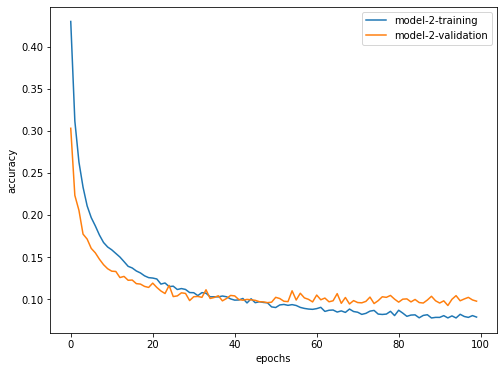

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(history_2.history['loss'], label='model-2-training')
plt.plot(history_2.history['val_loss'], label='model-2-validation')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()

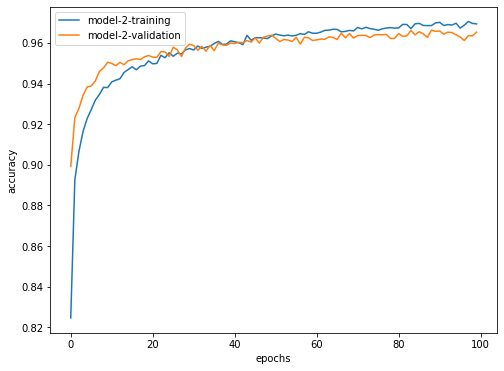

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(history_2.history['binary_accuracy'], label='model-2-training')
plt.plot(history_2.history['val_binary_accuracy'], label='model-2-validation')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()

In [ ]:
# 載入Model 2準確率最高的模型權重
model_2.load_weights('lab2-4' + '/Best-model-2.h5')
loss_2, accuracy_2 = model_2.evaluate(x_test_one_hot, y_test)
print("Model-2: {}%".format(accuracy_2))

313/313 [==============================] - 1s 3ms/step - loss: 0.1060 - binary_accuracy: 0.9652
Model-2: 0.9652000069618225%


In [ ]:
venusaur = np.expand_dims(pokemon_data_one_hot[3], axis=0)    # 妙蛙花
charizard = np.expand_dims(pokemon_data_one_hot[7], axis=0)   # 噴火龍
blastoise = np.expand_dims(pokemon_data_one_hot[12], axis=0)  # 水箭龜

print(venusaur.shape)

(1, 27)


In [ ]:
print(np.concatenate([venusaur, charizard], axis=-1).shape)

# 妙蛙花 vs 噴火龍
pred = model_2.predict(np.concatenate([venusaur, charizard], axis=-1))
winner = '妙蛙花' if pred < 0.5 else '噴火龍'
print("pred={}, {} 獲勝".format(pred, winner))

# 噴火龍 vs 水箭龜
pred = model_2.predict(np.concatenate([charizard, blastoise], axis=-1))
winner = '噴火龍' if pred < 0.5 else '水箭龜'
print("pred={}, {} 獲勝".format(pred, winner))

# 水箭龜 vs 妙蛙花
pred = model_2.predict(np.concatenate([blastoise, venusaur], axis=-1))
winner = '水箭龜' if pred < 0.5 else '妙蛙花'
print("pred={}, {} 獲勝".format(pred, winner))

(1, 54)
1/1 [==============================] - 0s 140ms/step
pred=[[0.9999999]], 噴火龍 獲勝
1/1 [==============================] - 0s 28ms/step
pred=[[1.7039437e-08]], 噴火龍 獲勝
1/1 [==============================] - 0s 23ms/step
pred=[[0.99992675]], 妙蛙花 獲勝


Reference: https://github.com/taipeitechmmslab/MMSLAB-TF2

